In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


In [2]:
test_data=pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
test_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


In [3]:
train_data=pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')

In [4]:
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [5]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [6]:
for i in train_data:
  print(train_data[i].nunique())
  print(train_data[i].value_counts())


15304
0        1
10207    1
10195    1
10196    1
10197    1
        ..
5105     1
5106     1
5107     1
5108     1
15303    1
Name: id, Length: 15304, dtype: int64
3
Female    9446
Male      5857
Other        1
Name: gender, dtype: int64
106
57.00    353
78.00    337
53.00    311
31.00    310
45.00    309
        ... 
0.16       6
0.08       6
0.48       3
1.30       2
0.68       1
Name: age, Length: 106, dtype: int64
2
0    14543
1      761
Name: hypertension, dtype: int64
2
0    14947
1      357
Name: heart_disease, dtype: int64
2
Yes    10385
No      4919
Name: ever_married, dtype: int64
5
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64
2
Rural    7664
Urban    7640
Name: Residence_type, dtype: int64
3740
93.88     33
85.84     33
77.55     32
72.49     31
73.00     31
          ..
229.92     1
61.12      1
86.66      1
116.14     1
77.65      1
Name: avg_glucose_level, Length: 3740, dtype: 

In [7]:
null=train_data.isnull().sum().sort_values(ascending=False)
null[null>0]
total_rows=15304
null_per=pd.DataFrame(null[null>0])
null_per.columns=['Missing']
null_per['Missing%']=((null_per['Missing']/total_rows)*100).round(2)
null_per

,Missing,Missing%


there are no null values in the data.

In [8]:
train_data.drop(['id'],axis=1,inplace=True)

we dropped the id column beacuse there is no repeated values in that column

In [9]:
train_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
catt_attr=(['gender','ever_married','work_type','Residence_type','smoking_status','hypertension','heart_disease'])
train_data[catt_attr]=train_data[catt_attr].astype('category')

In [11]:
num_attr =(['age','avg_glucose_level','bmi'])

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


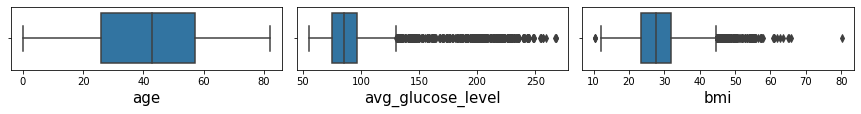

In [13]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in num_attr:
        ax = plt.subplot(10,5, plotnumber)
        sns.boxplot(train_data[col])
        plt.xlabel(col, fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

In [14]:
for col in num_attr:
  q1=train_data[col].quantile(0.25)
  q3=train_data[col].quantile(0.70)
  iqr = q3-q1
  filter1 = (train_data[col]>=q1 - 1.5*iqr) & (train_data[col]<=q3+1.5*iqr)
  data=train_data.loc[filter1]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


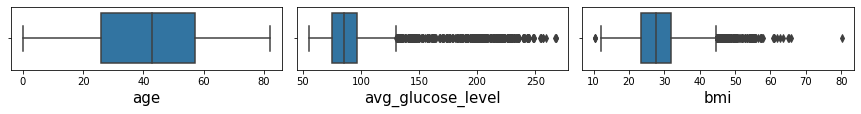

In [15]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in num_attr:
        ax = plt.subplot(10,5, plotnumber)
        sns.boxplot(train_data[col])
        plt.xlabel(col, fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

In [16]:
train_data=pd.get_dummies(train_data)

In [17]:
train_data

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,79.53,31.1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,33.0,78.44,23.9,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,42.0,103.00,40.3,0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
3,56.0,64.87,28.8,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,24.0,73.36,28.8,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,22.0,72.63,19.5,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
15300,46.0,101.19,32.1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
15301,75.0,87.69,26.2,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
15302,46.0,101.13,22.5,0,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0


encoding done using dummies

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y=train_data['stroke']
X=train_data.drop('stroke',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=123)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12243, 23)
(3061, 23)
(12243,)
(3061,)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
train_data.dtypes

age                               float64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
hypertension_0                      uint8
hypertension_1                      uint8
heart_disease_0                     uint8
heart_disease_1                     uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes             

In [23]:
num_attr=X_train.select_dtypes(['int64','float64','uint8']).columns
num_attr

Index(['age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'gender_Other', 'hypertension_0', 'hypertension_1', 'heart_disease_0',
       'heart_disease_1', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [24]:
X_train[num_attr]=scaler.fit_transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])

In [25]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(class_weight='balanced',solver='saga')
LR.fit(X_train,y_train)
X_train_pred=LR.predict(X_train)
X_test_pred=LR.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

In [27]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, X_train_pred)}")
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, X_test_pred)}")

========Train=======
Confusion Matrix 
[[9251 2494]
 [  85  413]]
========Test=======
Confusion Matrix 
[[2310  617]
 [  26  108]]


In [28]:
print(accuracy_score(y_train,X_train_pred))
print(recall_score(y_train,X_train_pred))
print(f1_score(y_train,X_train_pred))

0.7893490157641101
0.8293172690763052
0.24258443465491922


In [29]:
print("accuracy-score",(accuracy_score(y_test,X_test_pred)))
print("recall-score",recall_score(y_test,X_test_pred))
print(f1_score(y_test,X_test_pred))

accuracy-score 0.789937928781444
recall-score 0.8059701492537313
0.25145518044237486


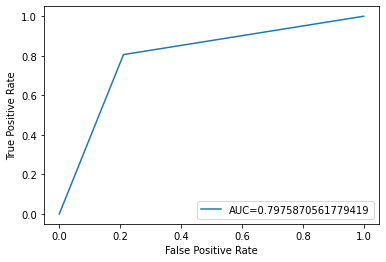

In [30]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, X_test_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  X_test_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

test data

In [31]:
test_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000
mean,20405.500000,41.920713,0.051450,0.021756,89.197766,28.242351
std,2945.785407,21.097956,0.220925,0.145894,25.914364,6.733863
min,15304.000000,0.080000,0.000000,0.000000,55.120000,11.500000
25%,17854.750000,26.000000,0.000000,0.000000,75.060000,23.700000
50%,20405.500000,43.500000,0.000000,0.000000,85.070000,27.700000
75%,22956.250000,57.000000,0.000000,0.000000,96.750000,32.000000
max,25507.000000,82.000000,1.000000,1.000000,267.600000,97.600000


In [32]:
null=train_data.isnull().sum().sort_values(ascending=False)
null[null>0]
total_rows=15304
null_per=pd.DataFrame(null[null>0])
null_per.columns=['Missing']
null_per['Missing%']=((null_per['Missing']/total_rows)*100).round(2)
null_per

,Missing,Missing%


In [33]:
test_data.drop(['id'],axis=1,inplace=True)

In [34]:
catt_attr_test=(['gender','ever_married','work_type','Residence_type','smoking_status','hypertension','heart_disease'])
test_data[catt_attr_test]=test_data[catt_attr_test].astype('category')

In [35]:
num_attr_test =(['age','avg_glucose_level','bmi'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


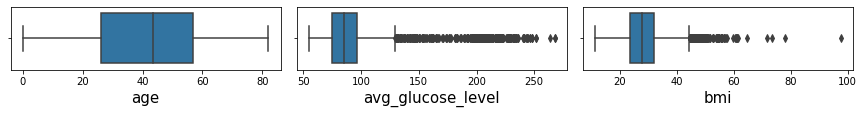

In [36]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in num_attr_test:
        ax = plt.subplot(10,5, plotnumber)
        sns.boxplot(test_data[col])
        plt.xlabel(col, fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

In [37]:
for col in num_attr_test:
  q1=test_data[col].quantile(0.25)
  q3=test_data[col].quantile(0.70)
  iqr = q3-q1
  filter1 = (test_data[col]>=q1 - 1.5*iqr) & (test_data[col]<=q3+1.5*iqr)
  data=test_data.loc[filter1]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


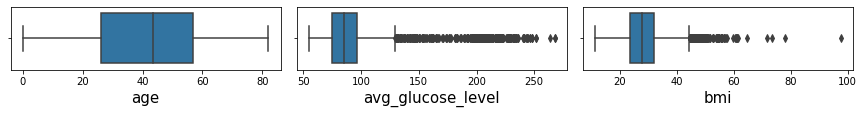

In [38]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in num_attr_test:
        ax = plt.subplot(10,5, plotnumber)
        sns.boxplot(test_data[col])
        plt.xlabel(col, fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

In [39]:
test_data=pd.get_dummies(test_data)

In [40]:
test_data

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,57.0,82.54,33.4,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,70.0,72.06,28.5,0,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
2,5.0,103.72,19.5,1,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,56.0,69.24,41.4,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,32.0,111.15,30.1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,27.0,75.77,17.6,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
10200,49.0,102.91,26.7,0,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10201,3.0,104.04,18.3,1,0,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
10202,31.0,82.41,28.7,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [41]:
test=LR.predict(test_data)

In [42]:
test=LR.predict_proba(test_data)

In [43]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e2/sample_submission.csv")
sample_submission["stroke"] = test
sample_submission.to_csv("submission.csv", index=False)

In [44]:
pd.read_csv("submission.csv")

,id,stroke
0,15304,0.000000e+00
1,15305,0.000000e+00
2,15306,3.552714e-15
3,15307,0.000000e+00
4,15308,0.000000e+00
...,...,...
10199,25503,0.000000e+00
10200,25504,0.000000e+00
10201,25505,3.090861e-13
10202,25506,0.000000e+00


In [45]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(class_weight="balanced")
DTC.fit(X_train,y_train)
y_pred_train = DTC.predict(X_train)
y_pred_test = DTC.predict(X_test)
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_pred_train)}")
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_pred_test)}")

========Train=======
Confusion Matrix 
[[11745     0]
 [    0   498]]
========Test=======
Confusion Matrix 
[[2827  100]
 [ 113   21]]


In [46]:
print(accuracy_score(y_train,y_pred_train))
print(recall_score(y_train,y_pred_train))
print(f1_score(y_train,y_pred_train))

1.0
1.0
1.0


In [47]:
print("accuracy-score",(accuracy_score(y_test,y_pred_test)))
print("recall-score",recall_score(y_test,y_pred_test))
print(f1_score(y_test,y_pred_test))

accuracy-score 0.9304148970924534
recall-score 0.15671641791044777
0.1647058823529412


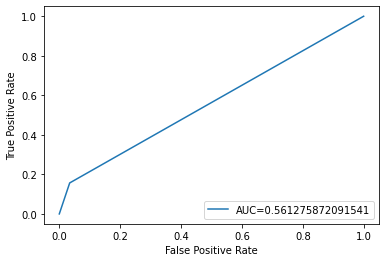

In [48]:
auc = metrics.roc_auc_score(y_test, y_pred_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_test)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights="uniform")
KNN.fit(X_train,y_train)
X_train_pred=KNN.predict(X_train)
X_test_pred=KNN.predict(X_test)
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, X_train_pred)}")
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, X_test_pred)}")

========Train=======
Confusion Matrix 
[[11710    35]
 [  430    68]]
========Test=======
Confusion Matrix 
[[2913   14]
 [ 128    6]]


In [50]:
print(accuracy_score(y_train,X_train_pred))
print(recall_score(y_train,X_train_pred))
print(f1_score(y_train,X_train_pred))

0.9620191129625092
0.13654618473895583
0.22628951747088186


In [51]:
print("accuracy-score",(accuracy_score(y_test,X_test_pred)))
print("recall-score",recall_score(y_test,X_test_pred))
print(f1_score(y_test,X_test_pred))

accuracy-score 0.953609931394969
recall-score 0.04477611940298507
0.0779220779220779


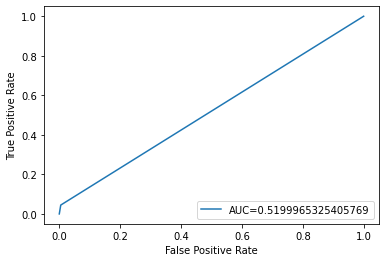

In [52]:
auc = metrics.roc_auc_score(y_test, X_test_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  X_test_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [53]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB().fit(X_train,y_train) 
nb_pred_train = NBmodel.predict(X_train)  
nb_pred_test = NBmodel.predict(X_test) #predict on test data 

In [54]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, nb_pred_train)}")

========Train=======
Confusion Matrix 
[[3932 7813]
 [  28  470]]


In [55]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, nb_pred_test)}")#confusion matrix of test dfs

========Test=======
Confusion Matrix 
[[ 977 1950]
 [   5  129]]


In [56]:
print(accuracy_score(y_train,nb_pred_train))
print(recall_score(y_train,nb_pred_train))
print(f1_score(y_train,nb_pred_train))

0.35955239728824634
0.9437751004016064
0.10704931101241318


In [57]:
print("accuracy-score",(accuracy_score(y_test,nb_pred_test)))
print("recall-score",recall_score(y_test,nb_pred_test))
print(f1_score(y_test,nb_pred_test))

accuracy-score 0.36131983012087554
recall-score 0.9626865671641791
0.11658382286488927


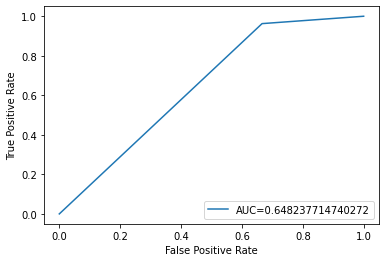

In [58]:
auc = metrics.roc_auc_score(y_test, nb_pred_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  nb_pred_test)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(class_weight='balanced',criterion = 'gini', max_leaf_nodes = 15, min_samples_split = 12)
RF.fit(X_train,y_train)
X_train_pred3=RF.predict(X_train)
X_test_pred3=RF.predict(X_test)
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, X_train_pred3)}")
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, X_test_pred3)}")
print("ACCURACY")
print(accuracy_score(y_train,X_train_pred3))
print(accuracy_score(y_test,X_test_pred3))
print("RECALL")
print(recall_score(y_train,X_train_pred3))
print(recall_score(y_test,X_test_pred3))

========Train=======
Confusion Matrix 
[[8079 3666]
 [  32  466]]
========Test=======
Confusion Matrix 
[[2006  921]
 [  13  121]]
ACCURACY
0.6979498488932451
0.6948709572035282
RECALL
0.9357429718875502
0.9029850746268657


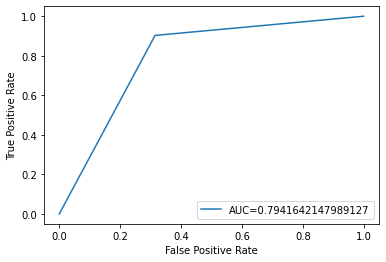

In [60]:
auc = metrics.roc_auc_score(y_test, X_test_pred3)
fpr, tpr, _ = metrics.roc_curve(y_test,  X_test_pred3)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [61]:
from sklearn.svm import SVC
 
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='poly', gamma= 1,class_weight='balanced')
svc_model.fit(X_train, y_train)
X_train_pred=RF.predict(X_train)
X_test_pred=RF.predict(X_test)
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, X_train_pred)}")
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, X_test_pred)}")
print("ACCURACY")
print(accuracy_score(y_train,X_train_pred))
print(accuracy_score(y_test,X_test_pred))
print("RECALL")
print(recall_score(y_train,X_train_pred))
print(recall_score(y_test,X_test_pred))

========Train=======
Confusion Matrix 
[[8079 3666]
 [  32  466]]
========Test=======
Confusion Matrix 
[[2006  921]
 [  13  121]]
ACCURACY
0.6979498488932451
0.6948709572035282
RECALL
0.9357429718875502
0.9029850746268657


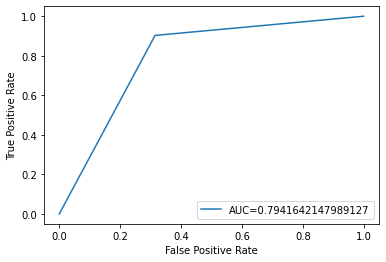

In [62]:
auc = metrics.roc_auc_score(y_test, X_test_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  X_test_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [63]:
test=NBmodel.predict(test_data)
test=NBmodel.predict_proba(test_data)
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e2/sample_submission.csv")
sample_submission["stroke"] = test
sample_submission.to_csv("submission.csv", index=False)
pd.read_csv("submission.csv")

,id,stroke
0,15304,1.0
1,15305,1.0
2,15306,1.0
3,15307,1.0
4,15308,1.0
...,...,...
10199,25503,1.0
10200,25504,1.0
10201,25505,1.0
10202,25506,1.0


In [64]:
test=KNN.predict(test_data)
test=KNN.predict_proba(test_data)
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e2/sample_submission.csv")
sample_submission["stroke"] = test
sample_submission.to_csv("submission.csv", index=False)
pd.read_csv("submission.csv")

,id,stroke
0,15304,0.8
1,15305,0.8
2,15306,0.8
3,15307,1.0
4,15308,0.8
...,...,...
10199,25503,0.8
10200,25504,0.8
10201,25505,0.8
10202,25506,1.0
